In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.preprocessing import PowerTransformer, StandardScaler, scale
from google.colab import files

In [ ]:
df = pd.read_csv('/content/2019-Nov (2).csv')

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


#Verificar estatísticas do dataset

In [ ]:
#estatisticas do codigo
df.describe()

,product_id,category_id,price,user_id
count,2.503437e+06,2.503437e+06,2.503437e+06,2.503437e+06
mean,5.468821e+06,1.547591e+18,8.512506e+00,5.050761e+08
std,1.320402e+06,1.614590e+17,1.951236e+01,8.459426e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06
25%,5.711108e+06,1.487580e+18,2.060000e+00,4.692921e+08
50%,5.809856e+06,1.487580e+18,3.970000e+00,5.411466e+08
75%,5.854578e+06,1.487580e+18,6.830000e+00,5.668597e+08
max,5.906122e+06,2.195085e+18,3.076000e+02,5.734638e+08


In [ ]:
df.shape

(2503437, 9)

In [ ]:
df.duplicated().sum()
print (df.duplicated(subset=None).any())

True


In [ ]:
df.groupby(by=['user_session', 'event_type', 'product_id', 'event_time'])['user_session'].count().sort_values(ascending=False)

user_session                          event_type        product_id  event_time             
1d2c4867-d62b-4326-beeb-ee17c0d1b825  remove_from_cart  5758984     2019-11-15 14:08:23 UTC    20
018ee332-436a-44fe-96fc-c5318c5e2d5a  remove_from_cart  5773392     2019-11-08 15:18:56 UTC    19
f0e2ae04-7ee3-4244-9ce5-ced188608371  cart              5310        2019-11-12 17:49:12 UTC    17
544c668b-28d3-40d7-9c3d-61dfeec08509  cart              5685678     2019-11-04 11:32:17 UTC    17
07989261-7478-4c32-a63e-ad4f3bfa8dee  remove_from_cart  5764301     2019-11-13 18:42:30 UTC    15
                                                                                               ..
57d3394e-ea20-4f29-8375-3cd8ef16a412  cart              5846446     2019-11-06 14:07:13 UTC     1
                                                        5774328     2019-11-06 14:26:25 UTC     1
                                                        5668003     2019-11-06 14:25:56 UTC     1
                          

In [ ]:
print(df.shape)
df.drop_duplicates(subset=['user_session', 
                           'event_type', 
                           'product_id', 
                           'event_time'], inplace=True)

(2503437, 9)


In [ ]:
print(df.shape) #apos retirar as duplicadas
(df.groupby(by=['user_session', 
               'event_type', 
               'product_id', 
               'event_time'])['user_session']
 .count().sort_values(ascending=False))

(2372117, 9)


user_session                          event_type        product_id  event_time             
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04  view              5829298     2019-11-05 07:57:05 UTC    1
ab250281-288d-46a2-ae1b-d397a32ffbd3  cart              5899827     2019-11-11 16:27:03 UTC    1
ab23e14c-59cb-4b71-9242-9c294cacb811  view              5886558     2019-11-08 15:05:56 UTC    1
ab240cb8-3c1f-4ed6-a225-bd408f4c4553  view              5696306     2019-11-12 09:20:06 UTC    1
ab2444f6-0753-46e2-8c8d-7818e052cfa6  cart              5815660     2019-11-07 09:52:40 UTC    1
                                                                                              ..
55a40348-2c04-468b-ac9d-6336a06fd944  cart              5835327     2019-11-04 07:59:15 UTC    1
                                                        5866421     2019-11-04 08:27:38 UTC    1
                                      remove_from_cart  6736        2019-11-06 12:16:29 UTC    1
                                   

#Etapa 3


In [ ]:
df['event_time'] = df['event_time'].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372117 entries, 0 to 2503436
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 181.0+ MB


#Etapa 4

In [ ]:
percentiles = [0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.99]
df.describe(include = 'number', percentiles = percentiles)

,product_id,category_id,price,user_id,price_
count,2.372117e+06,2.372117e+06,2.372117e+06,2.372117e+06,2.372117e+06
mean,5.466093e+06,1.547854e+18,8.720087e+00,5.054443e+08,5.377826e+00
std,1.326080e+06,1.618198e+17,1.991104e+01,8.493018e+07,4.383681e+00
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06,-5.560000e+00
1%,4.958000e+03,1.487580e+18,3.200000e-01,2.308260e+08,3.200000e-01
10%,5.582546e+06,1.487580e+18,9.500000e-01,3.892639e+08,9.500000e-01
25%,5.711117e+06,1.487580e+18,2.060000e+00,4.695064e+08,2.060000e+00
50%,5.809861e+06,1.487580e+18,3.970000e+00,5.420895e+08,3.970000e+00
75%,5.854808e+06,1.487580e+18,7.140000e+00,5.670272e+08,7.140000e+00
90%,5.883100e+06,1.783999e+18,1.571000e+01,5.702643e+08,1.476000e+01


In [ ]:
# complete
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

df['price_'] = df['price'].clip(lower=q1 - 1.5*iqr, upper=q3 + 1.5*iqr)

# Etapa 5

In [ ]:
df.event_type.isna().value_counts() 

False    2372117
Name: event_type, dtype: int64

In [ ]:
x = df['event_type'].value_counts().index
y = df['event_type'].value_counts()

<Axes: ylabel='event_type'>

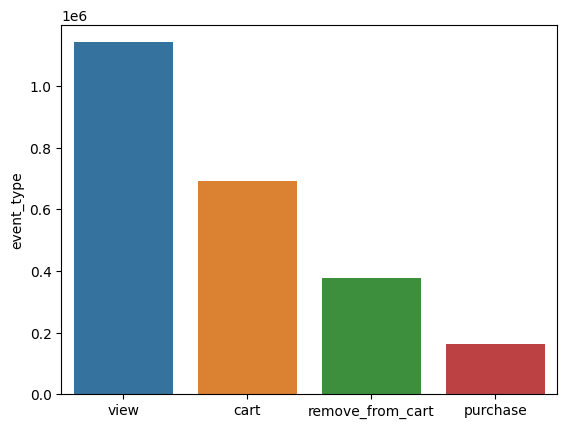

In [ ]:
 sns.barplot(x = x, y = y, saturation= 0.7, order=[ 'view','cart' , 'remove_from_cart', 'purchase'])

In [ ]:
def custom_plot(df, x='product_category_name', y='price', title=None, **kwargs):
  """Plots target-variable box-plot and target-variable by chosen category"""
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(24, 16))
  sns.boxplot(data=df, y=y, ax=axes[0], flierprops=dict(marker='o', markerfacecolor='None'), **kwargs)
  sns.boxplot(data=df, x=x, y=y, ax=axes[1], flierprops=dict(marker='o', markerfacecolor='None'), **kwargs)
  axes[0].set_title(title, weight='bold', size='x-large')
  axes[1].set_title(title + f' (by {x})', weight='bold', size='x-large')
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60, ha='right')
  [ax.grid(True, alpha=.2) for ax in axes]
  [ax.set_xlabel(None) for ax in axes]

307.6
-79.37


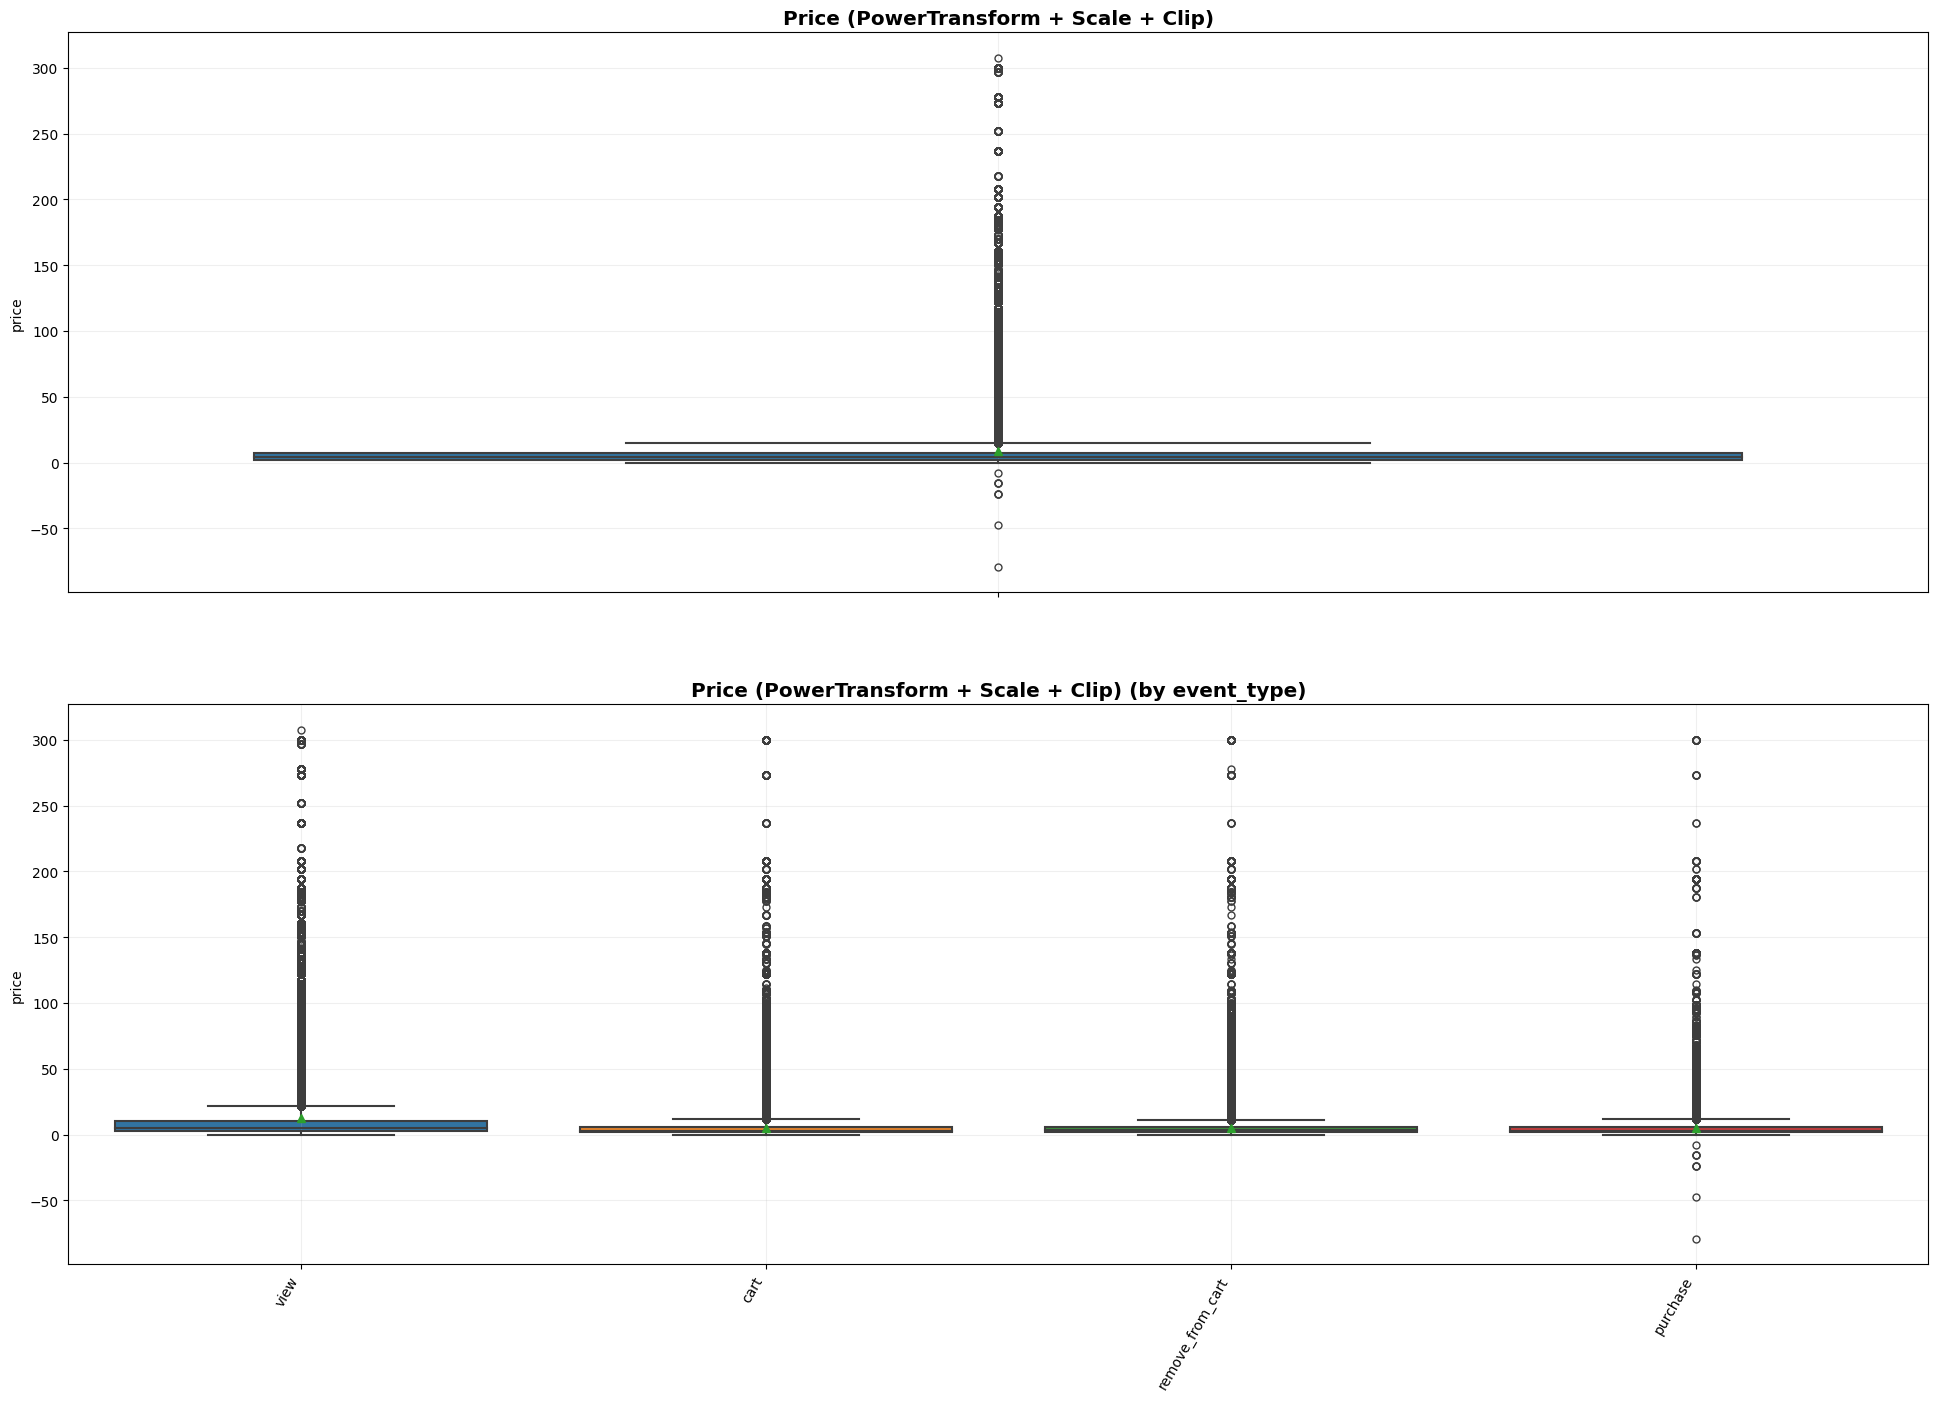

In [ ]:
print(max(df['price']))
print(min(df['price']))
custom_plot(df, x='event_type', y='price', title='Price (PowerTransform + Scale + Clip)', showmeans=True)

14.76
-5.5600000000000005


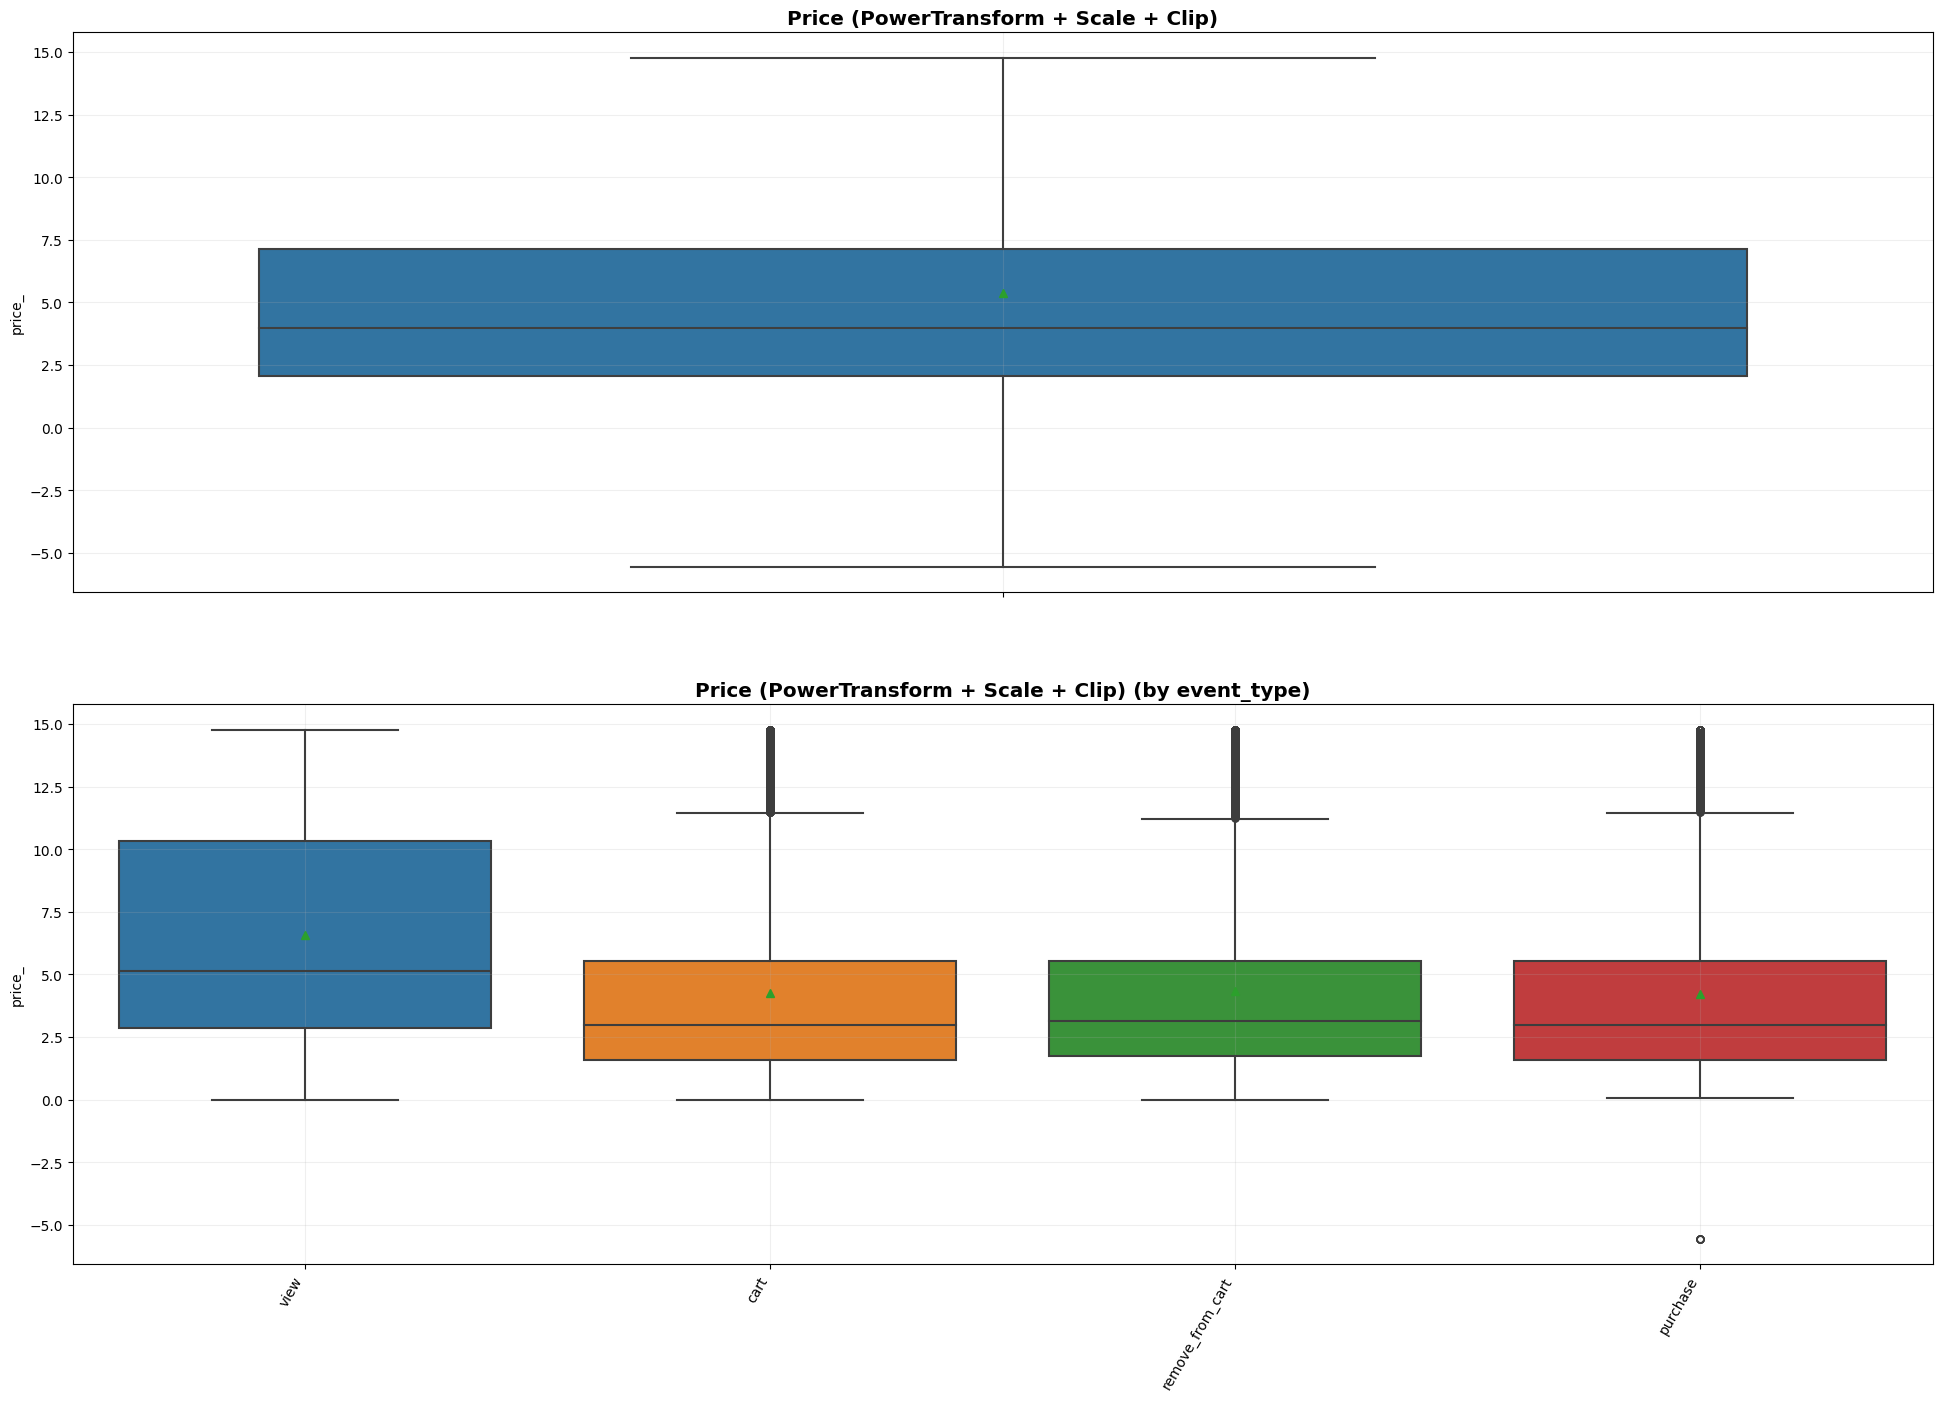

In [ ]:
print(max(df['price_']))
print(min(df['price_']))
custom_plot(df, x='event_type', y='price_', title='Price (PowerTransform + Scale + Clip)', showmeans=True)

In [ ]:
df[df['price_']<0]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_
73174,2019-11-01 15:36:23,purchase,5716855,1487580014042939619,NaN,NaN,-7.94,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3,-5.56
330623,2019-11-03 18:47:04,purchase,5716859,1487580014042939619,NaN,NaN,-47.62,567194545,fd27b149-3006-41cd-8afc-884c47272e5d,-5.56
408236,2019-11-04 11:54:29,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015,-5.56
408237,2019-11-04 11:54:29,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015,-5.56
706884,2019-11-06 11:51:26,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,568159131,8edce83b-2d4c-4654-89e6-16234303031c,-5.56
749942,2019-11-06 17:31:51,purchase,5716861,1487580014042939619,NaN,NaN,-79.37,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70,-5.56
749943,2019-11-06 17:31:51,purchase,5670257,1487580014042939619,NaN,NaN,-15.87,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70,-5.56
1372173,2019-11-10 20:16:38,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,549736485,d1acbc83-3876-4317-a00f-6c60800f4572,-5.56
2310273,2019-11-18 07:06:17,purchase,5716857,1487580014042939619,NaN,NaN,-23.81,565309368,47af9baa-94af-4334-a4ac-514230ddfa9c,-5.56
